### Student Information
Name: Hadar Natanson (Harper/羅蕙)

Student ID:112065430

GitHub ID: Hadar-N

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
# copy imports+variable definitions from lab file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import data_mining_helpers_copy as dmh

%matplotlib inline

## TODO: ADD COMMENTS ##

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in term_frequencies]


35788


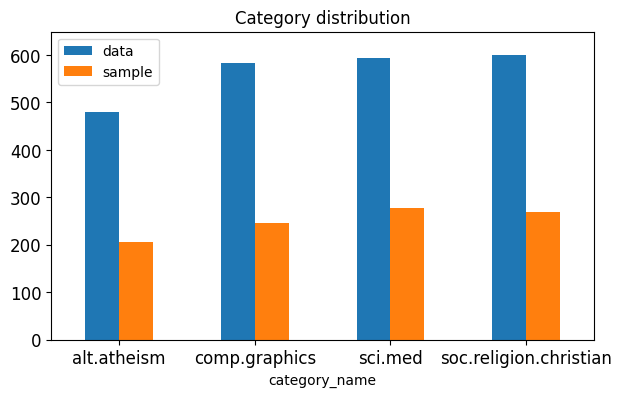

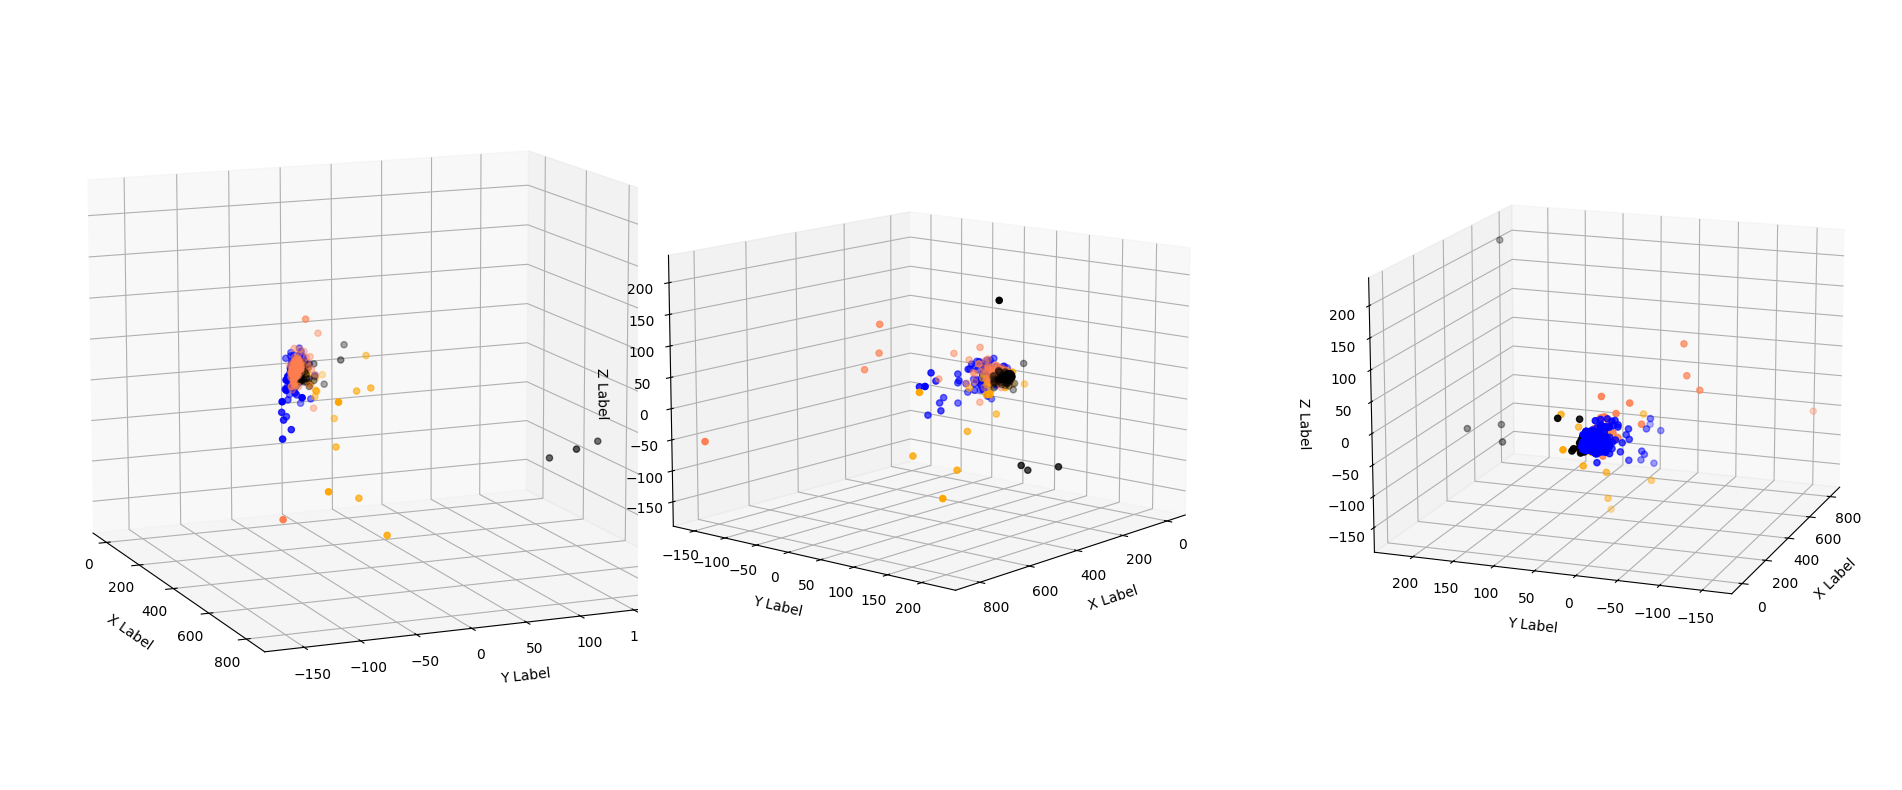

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


In [131]:
### PART 1- Take Home Assignments ###

# Exercise 2 #
# TODO: --the tryouts were deleted--

# Exercise 5 #
NA_dict = [{ 'id': 'A', 'missing_example': np.nan }, # np.nan Not a Number which is considered null value
           { 'id': 'B'                    }, # value in missing therefore null
           { 'id': 'C', 'missing_example': 'NaN'  }, # the value is string therefore non-null
           { 'id': 'D', 'missing_example': 'None' }, # the value is string therefore non-null
           { 'id': 'E', 'missing_example':  None  }, # in Python, None keyword defines a null value
           { 'id': 'F', 'missing_example': ''     }] # in panda package, empty strings aren't considered null (as written in their documentation in https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html). 
# ==> results of isnull() should return: A,B,E: true, C,D,F: False.

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()


# Exercise 6 #
# TODO: CHECK DIFFERENCES BETWEEN X AND X_sample


#Exercise 8 #
X_sample = X.sample(n=1000,random_state=42)

def getSortedSeries(df):
    return df.category_name.value_counts().sort_index(key=lambda x : x.str.lower())

data_sample = getSortedSeries(X_sample)
data_full = getSortedSeries(X)
upper_bound = max(data_full + 50)

data_as_frame = pd.DataFrame({
    "data": data_full.values,
    "sample": data_sample.values
    },
    index= data_full.index
)

data_as_frame.plot(kind="bar",
    title = 'Category distribution',
    ylim = [0, upper_bound], 
    rot = 0, fontsize = 12, figsize = (7,4)
)



#Exercise 10#
def find_map_non_zeroes(table: np.ndarray) -> list:
    res = []
    for i in range(table.shape[0]):
        arr = np.where(table[i]>0)[0]
        for word_idx in arr:
            res.append((i,word_idx))
    return res

def find_matching_words(table: list,dictionary: CountVectorizer) -> list:
    res = []
    for i in table:
        res.append(dictionary.get_feature_names_out()[i[1]])

    return res

match_table = X_counts[0:5, 0:100].toarray()

#TODO: make into 1?
non_zeros = find_map_non_zeroes(match_table)
print(find_matching_words(non_zeros, count_vect))

#Exercise 11#

## TODO: 1st method- [NEED TO CHECK TERMINOLOGY!] check larger batches together, if the heatmap shows an area to be "hot", we can dissect it in another chart.
## TODO: 2nd method- [NEED TO CHECK TERMINOLOGY!] check few words across most documents to try and remove outliars 


#Exercise 12#
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

def plot_content(axis):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
    
        axis.scatter3D(xs, ys, zs, c = c, marker='o')

        axis.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
        axis.set_xlabel('\nX Label')
        axis.set_ylabel('\nY Label')
        axis.set_zlabel('\nZ Label')


# plot
fig = plt.figure(figsize = (25,10))

ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_content(ax)
ax.view_init(12, -23)

bx = fig.add_subplot(1, 3, 2, projection='3d')
plot_content(bx)
bx.view_init(12, 40)

cx = fig.add_subplot(1, 3, 3, projection='3d')
plot_content(cx)
cx.view_init(15, 200)

plt.show()
#TODO: check angles??
#TODO: add description for the results!!

#Exercise 13#
bar_df = pd.DataFrame(dict(
    term = count_vect.get_feature_names_out(),
    count = term_frequencies))

fig = px.bar(bar_df[:300], x = 'term', y = 'count',
             title = "wordcount barchart (plotly)")
fig.update_layout(
    font=dict(
        size=7,
        color="gray"
    )
)

fig.show()

#Exercise 14#

# 1st way: remove outliars with few occurrences, then sort the much smaller dataframe and view the top values
MIN_AMOUNT = 100
fig = px.bar(bar_df[bar_df['count'] > MIN_AMOUNT].sort_values(by="count", ascending=False)[:100],
             x = 'term', y = 'count',
             title = "wordcount barchart 2 (plotly)")
fig.update_layout(
    font=dict(
        size=9,
        color="gray"
    )
)
fig.show()


# 2nd way: sum up the amout of terms appearing a certain amount of times. this can be used to see how many terms are repetative, and we'll be able to later get data regarding said terms.
bar_df.groupby('count').count()
#  TODO: GRAPH!!!!!!!!!!!!

#Exercise 15#
#TODO: actuall long tail and not just ordered bar
fig = px.bar(bar_df[bar_df['count'] > MIN_AMOUNT].sort_values(by="count", ascending=False)[:300],
             x = 'term', y = 'count',
             title = "wordcount barchart (plotly)")
fig.update_layout(
    font=dict(
        size=7,
        color="gray"
    )
)

fig.show()

#Exercise 16#
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

#result- this works great. The reason iswe originally used the names to filter out data, therefore we can promise a closed list of categories, which are the same aw were used to create the "category" property, therefore they match.
#TODO: fix explanation because it's shit.


In [148]:
##DRAFT##
#TODO: clean this part

# 2nd way: sum up the amout of terms appearing a certain amount of times. this can be used to see how many terms are repetative, and we'll be able to later get data regarding said terms.
new_df = bar_df.groupby('count')['term'].agg(list)
# print (new_df)
# fig = px.bar(new_df, x = 'term', y = 'count',
#              title = "wordcount barchart (plotly)")
# fig.update_layout(
#     font=dict(
#         size=7,
#         color="gray"
#     )
# )

# fig.show()
print(new_df)

                                                    term
count                                                   
1      [0000, 000005102000, 000100255pixel, 00014, 00...
2      [0000001200, 000usd, 001642, 003258u19250, 004...
3      [0001, 0010580b, 002, 02118, 02173, 023044, 02...
4      [0100, 01580, 0200, 040, 0423, 095220, 101010,...
5      [00am, 0349, 0511, 081052, 084042, 1024, 104, ...
...                                                  ...
12343                                               [is]
13017                                              [and]
17222                                               [to]
17660                                               [of]
29825                                              [the]

[501 rows x 1 columns]


In [188]:
### PART 1- New Database ###

repository_name = 'new_dataset'
filenames = ["amazon_cells_labelled.txt","imdb_labelled.txt","yelp_labelled.txt"]
full_new_data = df = pd.DataFrame(None, columns=["text", "score", "source"]) 
for filename in filenames:
    currFrame = (pd.DataFrame(np.loadtxt(repository_name+"/"+filename, delimiter='	', dtype=str), columns=["text", "score"]))
    currFrame["source"] = filename
    full_new_data = pd.concat([full_new_data,currFrame])

full_new_data



,text,score,source
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt
2,Great for the jawbone.,1,amazon_cells_labelled.txt
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt
4,The mic is great.,1,amazon_cells_labelled.txt
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp_labelled.txt
996,Appetite instantly gone.,0,yelp_labelled.txt
997,Overall I was not impressed and would not go b...,0,yelp_labelled.txt
998,"The whole experience was underwhelming, and I ...",0,yelp_labelled.txt
